# 2d Griffith Crack inverse problem (2DP1)

Instead of just one collocation point per element like in the case of the 2DP0 kernel, the 2DP1 kernel has 2 collocation points.

When the traction boundary conditions are specified as follows,
$$
t(x) =
    \begin{cases}
        \sigma_A & \text{if } x \leq |a|\\
        0 & \text{if } x > |a|
    \end{cases}
$$

We construct an augmented collocation matrix to place two collocation points per element.

The displacement solution for the Griffith crack is given as seen in Weertman (1996) as,
$$
D(x) = {2 (1-\nu) \sigma_A \over G} \sqrt{a^2 - x^2}
$$

In [18]:
import sys
import os
home = os.environ["HOME"]
sys.path.append(home + "/Desktop/GEL/BigWham/build/interfaces/python")
from hmatrix import Hmatrix
import numpy as np
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex']=True
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.1
plt.rcParams["savefig.dpi"] = 100
plt.rcParams["text.latex.preamble"] =r'\usepackage{amsmath}'+ r'\usepackage{amssymb}' + r'\usepackage{accents}'+ r'\usepackage{bm}'+ r'\boldmath'+ r'\renewcommand{\v}[1]{\boldsymbol{{#1}}}'+ r'\DeclareRobustCommand{\sot}[1]{\boldsymbol{{#1}}}'

In [19]:
# Material properties
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)
pre_fac = 2*((1 - nu)/G)

# Mesh
a = 1.0
nelts = 100
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)

# H-matrix parameter
max_leaf_size=100
eta=3.
eps_aca=1.e-4

# Hmatrix
kernel = "2DP1"
elas_prop = np.array([E, nu])
h = Hmatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

 Now setting things for kernel ... 2DP1 with properties size 2
Cluster tree creation time :  0
Time for binary cluster tree construction  3.137e-06
Binary cluster tree depth = 1
Number of blocks = 4
Number of full blocks = 4
Number of low rank blocks = 0
Pattern Created 
 Loop on full blocks construction  
 N full blocks 4 
Loop on low rank blocks construction
N low rank blocks 0
dof_dimension: 2
Creation of hmat done in 0.0120442
Compression ratio - 1
Hmat object - built 
HMAT --> built 
HMAT set, CR = 1, eps_aca = 0.0001, eta = 3
BigWhamIO ENDED


In [20]:
#collocation point array definitions
col_pts = h.getMeshCollocationPoints()

In [21]:
#inverse problem solved here
t = np.ones(h.shape[0])
t[0::2] = 0.
d = gmres(h, t, tol=1e-6)[0]

dd_calc = d.reshape((h.shape[0] // 2, 2))

#reference solution for griffith crack
dd_ref = np.zeros(col_pts.shape)
dd_ref[:, 1] = pre_fac * np.sqrt(a**2 - col_pts[:, 0]**2)

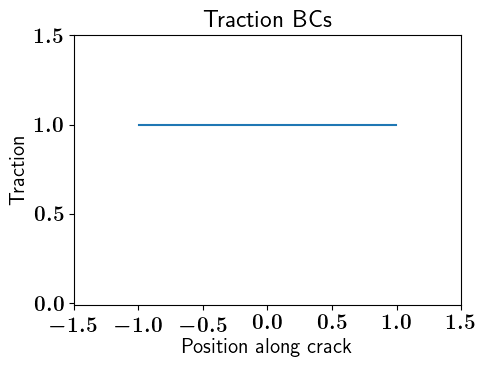

In [22]:
plt.plot(col_pts[:, 0], t.reshape(-1, 2)[:, 1])
plt.title("Traction BCs")
plt.xlabel("Position along crack")
plt.ylabel("Traction")
plt.xlim([-1.5, 1.5])
plt.ylim([-.01, 1.5])
plt.show()

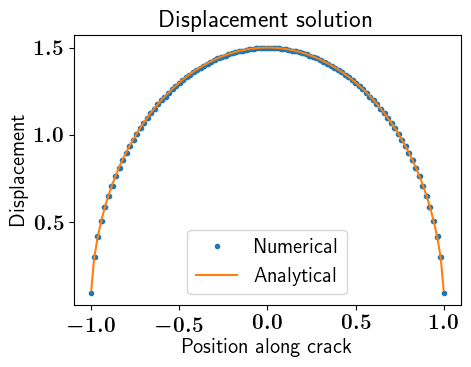

In [23]:
plt.plot(col_pts[:, 0], dd_calc[:, 1], ".")
plt.plot(col_pts[:, 0], dd_ref.reshape(-1, 2)[:, 1])
plt.title("Displacement solution")
plt.xlabel("Position along crack")
plt.ylabel("Displacement")
plt.legend(["Numerical", "Analytical"])

In [24]:
rel_err = np.linalg.norm(dd_ref.flatten() - dd_calc.flatten()) / dd_ref.shape[0]
print("L2 Rel error {}".format(rel_err))

L2 Rel error 0.00044880525692625966


In [25]:
rel_err = np.linalg.norm(dd_ref[:, 1] - dd_calc[:, 1]) / dd_ref.shape[0]
print("L2 Rel error {}".format(rel_err))

L2 Rel error 0.00044880525692625966


In [26]:
pressure = 1.0

G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)

pre_fac = 2*((1 + nu)/G)

nelts_array = [2**i for i in range(1, 15)]
rel_error_array = []

# H-matrix parameter
max_leaf_size = 100
eta = 3.
eps_aca = 1.e-4

for nelts in nelts_array:
    # Mesh
    coor1D = np.linspace(-a, a, nelts + 1)
    coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
    conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)

    # Hmatrix
    kernel = "2DP1"
    elas_prop = np.array([E, nu])
    hmat = Hmatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

    col_pts = hmat.getMeshCollocationPoints()

    trac = np.zeros(hmat.shape[0])
    trac[0::2] = 0.
    d = gmres(hmat, trac, tol=1e-6)[0]

    dd_calc = d.reshape((hmat.shape[0] // 2, 2))

    dd_ref = np.zeros(col_pts.shape)
    dd_ref[:, 1] = pre_fac * np.sqrt(a**2 - col_pts[:, 0]**2)

    rel_err = np.linalg.norm(dd_ref[:, 1] - dd_calc[:, 1]) / dd_ref.shape[0]

    #print("L2 Rel error {}".format(rel_err))
    rel_error_array.append(rel_err)

 Now setting things for kernel ... 2DP1 with properties size 2
Cluster tree creation time :  0
Time for binary cluster tree construction  3.51e-07
Binary cluster tree depth = 0
Number of blocks = 1
Number of full blocks = 1
Number of low rank blocks = 0
Pattern Created 
 Loop on full blocks construction  
 N full blocks 1 
Loop on low rank blocks construction
N low rank blocks 0
dof_dimension: 2
Creation of hmat done in 0.000181324
Compression ratio - 1
Hmat object - built 
HMAT --> built 
HMAT set, CR = 1, eps_aca = 0.0001, eta = 3
BigWhamIO ENDED
 Now setting things for kernel ... 2DP1 with properties size 2
Cluster tree creation time :  0
Time for binary cluster tree construction  3.93e-07
Binary cluster tree depth = 0
Number of blocks = 1
Number of full blocks = 1
Number of low rank blocks = 0
Pattern Created 
 Loop on full blocks construction  
 N full blocks 1 
Loop on low rank blocks construction
N low rank blocks 0
dof_dimension: 2
Creation of hmat done in 0.000116515
Compressi

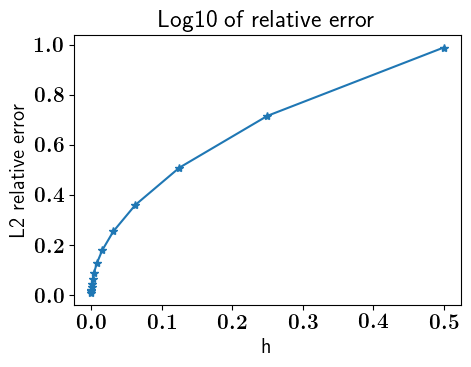

In [27]:
h_array = [1/nelts for nelts in nelts_array]

plt.figure()
plt.plot(h_array, rel_error_array, "*-")
plt.title("Log10 of relative error")
plt.xlabel("h")
plt.ylabel("L2 relative error")
plt.show()

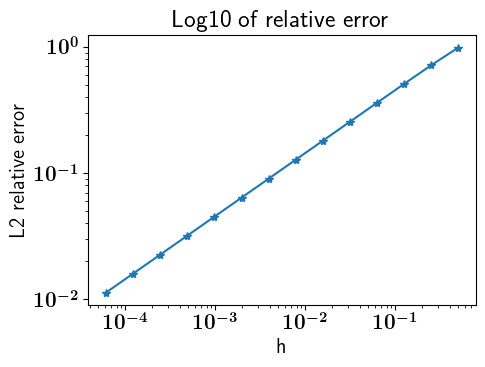

In [28]:
plt.figure()
plt.plot(h_array, rel_error_array, "*-")
plt.title("Log10 of relative error")
plt.xlabel("h")
plt.ylabel("L2 relative error")
plt.yscale('log')
plt.xscale('log')
#saves fig - remember to remove
#plt.savefig('log_rel_err_h.png', dpi=100, bbox_inches='tight')
plt.show()

In [29]:
log_h = np.log(np.asarray(nelts_array)[2:])
log_rel_array = np.log(np.asarray(rel_error_array)[2:])

m, c = np.polyfit(log_h, log_rel_array, 1)

print(m)
print(c)

-0.4998640332969988
0.3659661517734177


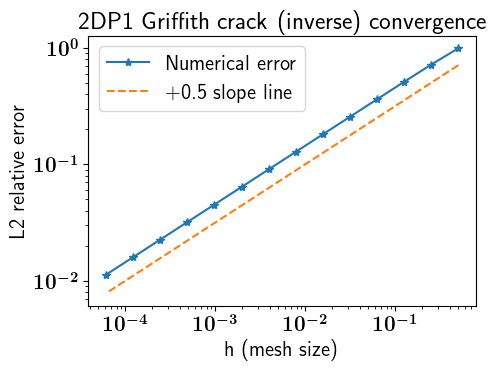

In [30]:
plt.figure()
plt.plot(h_array, rel_error_array, "*-")
plt.plot(h_array, 1*np.array(h_array) ** (0.5) , "--")
plt.title("2DP1 Griffith crack (inverse) convergence")
plt.legend(["Numerical error", "+0.5 slope line"])
plt.xlabel("h (mesh size)")
plt.ylabel("L2 relative error")
plt.yscale('log', base=10)
plt.xscale('log', base=10)
#saves fig - remember to remove
# plt.savefig('log2_rel_err_h.png', dpi=100, bbox_inches='tight')
# plt.show()